In [56]:
# Supervised Machine Learning
# Regression --> Polynomial Regression

# Polynomial Regression is a special case of Linear Regression where we fit
# the polynomial equation on the data with a curvilinear relationship between
# the dependent and independent variables.

# Polynomial Regression is a form of regression analysis in which the relationship
# between the independent variables and dependent variables are modeled in
# the nth degree polynomial.

# In Polynomial Regression we increase the degree of independent variable
# in order to have curvilinear relationship.

In [57]:
# In polynomial regression, the relationship between the dependent variable and the independent
# variable is modeled as an nth-degree polynomial function. When the polynomial is of degree 2,
# it is called a quadratic model; when the degree of a polynomial is 3,
# it is called a cubic model, and so on.

# Dataset : https://raw.githubusercontent.com/yash240990/Python/master/Position_Salaries.csv

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm

In [59]:
# STAGE 1 : Data Gathering / Load the Dataset

data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [60]:
# STAGE 2 : EDA
data.shape
data.columns
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


,0
Position,0
Level,0
Salary,0


In [61]:
# STAGE 3 : DATA PREPERATION
# a.) Check for missing and duplicate values
# b.) Convert non-numerical features into numerical features
# c.) Perform normalization
# d.) Select dependent and independent variable

In [62]:
data.isnull().sum()

,0
Position,0
Level,0
Salary,0


In [63]:
data.duplicated().sum()

np.int64(0)

In [64]:
# b.) Convert non-numerical features into numerical features
import sklearn.preprocessing as pp
lb = pp.LabelBinarizer()

In [65]:
data.Position = lb.fit_transform(data.Position)

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Position  10 non-null     int64
 1   Level     10 non-null     int64
 2   Salary    10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


In [67]:
# c.) Perform normalization
# d.) Select dependent and independent variable
# Independent variable - depends on user
# Dependent variable - depends on independent variables
data.columns

Index(['Position', 'Level', 'Salary'], dtype='object')

In [68]:
# Independent variable
x = data.Level.values
x = x.reshape(10,1)
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [69]:
# Dependent variable
y = data.Salary.values
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [70]:
# STAGE 4 : BUILDING A PREDICTIVE MODEL
# APPLY A SUITABLE ML ALGORITHM ON DATASET
# Model development using Simple Linear Regression
lin_reg = lm.LinearRegression()
lin_reg.fit(x,y)

LinearRegression()

In [71]:
predvalue = lin_reg.predict(x)
print(predvalue)

[-114454.54545455  -33575.75757576   47303.03030303  128181.81818182
  209060.60606061  289939.39393939  370818.18181818  451696.96969697
  532575.75757576  613454.54545455]


In [72]:
# Regression score function
from sklearn.metrics import r2_score
acc = r2_score(y,predvalue)
print("Regression score function : ", acc)
print(f"Accuracy of model : {int(acc*100)}%")

Regression score function :  0.6690412331929895
Accuracy of model : 66%


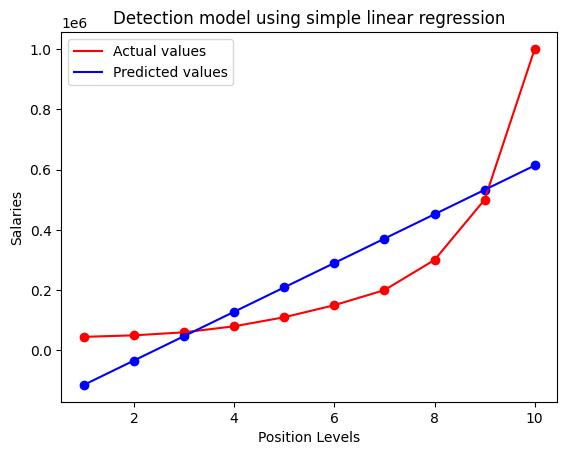

In [73]:
# Plot actual values
plt.plot(x , y, color = 'red' , label = 'Actual values')
plt.scatter(x , y, color = 'red')

# Plot actual values
plt.plot(x , predvalue, color = 'blue' , label = 'Predicted values')
plt.scatter(x , predvalue, color = 'blue')

plt.title('Detection model using simple linear regression')
plt.xlabel('Position Levels')
plt.ylabel('Salaries')
plt.legend()
plt.show()

In [74]:
# Building model using Polynomial Regression
# Generate polynomial and interaction features.
# Generate a new feature matrix consisting of all polynomial combinations of the
# features with degree less than or equal to the specified degree.
# in polynomial regression we increase degree of independent veriable to increase accuracy


from sklearn.preprocessing import PolynomialFeatures
poly_reg_2 = PolynomialFeatures(degree=2)

# First we increase the degree of independent variable
# and then we will train our model

x_poly_2 = poly_reg_2.fit_transform(x)
x_poly_2

# when degree = 2 , then new feature matrix will be created like this  1  x*1   x*x
# when degree = 3 , then new feature matrix will be created like this  1  x*1   x*x   x*x*x
# when degree = 4 , then new feature matrix will be created like this  1  x*1   x*x   x*x*x   x*x*x*x

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [75]:
# Model development using PolynomialFeature Degree = 2
lin_reg.fit(x_poly_2,y)

LinearRegression()

In [76]:
pred_values = lin_reg.predict(x_poly_2)
pred_values

array([118727.27272727,  44151.51515151,   8439.39393939,  11590.90909091,
        53606.06060606, 134484.84848485, 254227.27272727, 412833.33333333,
       610303.03030303, 846636.36363636])

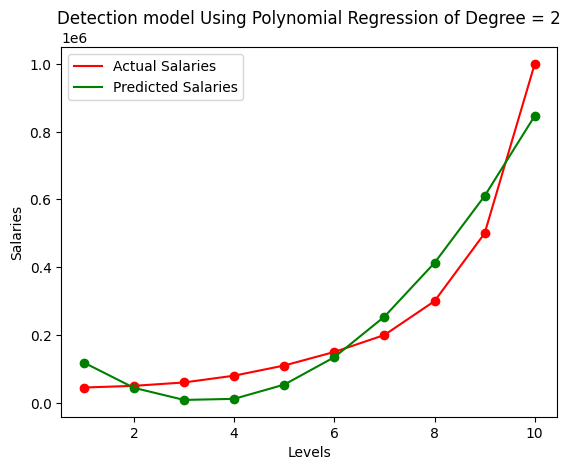

In [77]:
# plot actual values
plt.plot(x,y,color='red',label='Actual Salaries')
plt.scatter(x,y,color='red')
# plot predicted values
plt.plot(x,pred_values,color='g',label='Predicted Salaries')
plt.scatter(x,pred_values,color='g')
plt.title('Detection model Using Polynomial Regression of Degree = 2')
plt.xlabel('Levels')
plt.ylabel('Salaries')
plt.legend()
plt.show()

In [78]:
# Regression score function
from sklearn.metrics import r2_score
acc = r2_score(y,predvalue)
print("Regression score function : ", acc)
print(f"Accuracy of model : {int(acc*100)}%")

Regression score function :  0.6690412331929895
Accuracy of model : 66%


In [79]:
poly_reg_3 = PolynomialFeatures(degree=3)
x_poly_3 = poly_reg_3.fit_transform(x)
x_poly_3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [80]:
# Model development using PolynomialFeature Degree = 3
lin_reg.fit(x_poly_3,y)
pred_values = lin_reg.predict(x_poly_3)
pred_values

array([ 14902.09790211,  78759.90675991,  94960.37296037,  88223.77622378,
        83270.3962704 , 104820.51282052, 177594.40559441, 326312.35431236,
       575694.63869463, 950461.53846152])

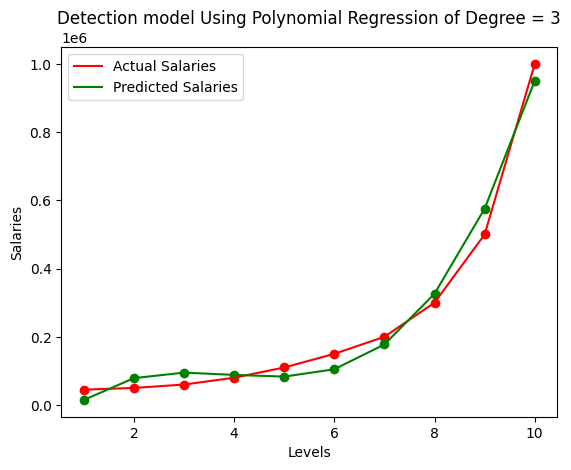

In [81]:
# plot actual values
plt.plot(x,y,color='red',label='Actual Salaries')
plt.scatter(x,y,color='red')
# plot predicted values
plt.plot(x,pred_values,color='g',label='Predicted Salaries')
plt.scatter(x,pred_values,color='g')
plt.title('Detection model Using Polynomial Regression of Degree = 3')
plt.xlabel('Levels')
plt.ylabel('Salaries')
plt.legend()
plt.show()

In [82]:
poly_reg_4 = PolynomialFeatures(degree=4)
x_poly_4 = poly_reg_4.fit_transform(x)
x_poly_4

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

In [83]:
# Model development using PolynomialFeature Degree = 4
lin_reg.fit(x_poly_4,y)
pred_values = lin_reg.predict(x_poly_4)
pred_values

array([ 53356.64335675,  31759.90675984,  58642.1911421 ,  94632.86713282,
       121724.94172495, 143275.05827509, 184003.49650352, 289994.17249417,
       528694.63869462, 988916.08391612])

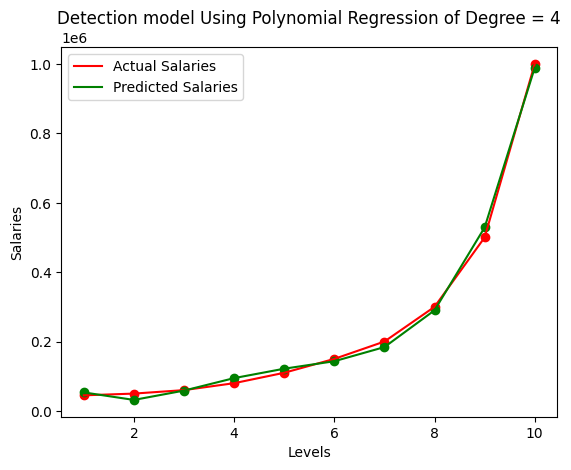

In [84]:
# plot actual values
plt.plot(x,y,color='red',label='Actual Salaries')
plt.scatter(x,y,color='red')
# plot predicted values
plt.plot(x,pred_values,color='g',label='Predicted Salaries')
plt.scatter(x,pred_values,color='g')
plt.title('Detection model Using Polynomial Regression of Degree = 4')
plt.xlabel('Levels')
plt.ylabel('Salaries')
plt.legend()
plt.show()

In [85]:
from sklearn.metrics import r2_score
accuracy = r2_score(y,pred_values)
print("Regression Score : ",accuracy)
print('Accuracy of the model is :',int(accuracy*100),'%')

Regression Score :  0.9973922891706614
Accuracy of the model is : 99 %


In [86]:
# Final Predictions
level = int(input('At level you are working : '))
level = poly_reg_4.fit_transform([[level]])
sal = lin_reg.predict(level)
print('Predicted Salary :',int(sal[0]))

At level you are working : 9
Predicted Salary : 528694
